In [4]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from basic_algorithm import matrix_modulus, modulus
from networkx_families import MinimumSpanningTree
import numpy as np
import cvxpy as cvx
from itertools import combinations
import random

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


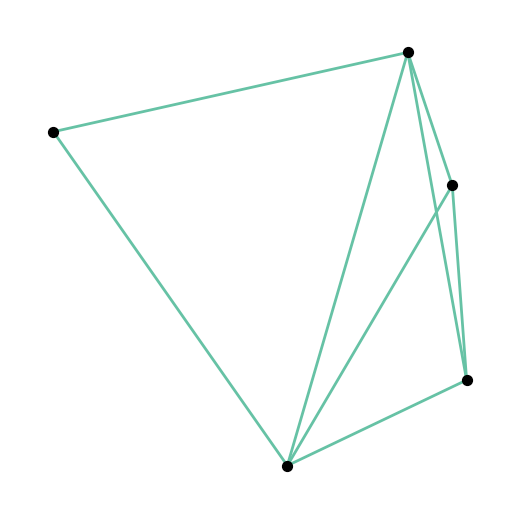

In [20]:
# compute eta*
G = nx.random_geometric_graph(5, 0.8, seed=3810312)
pos = {v:d['pos'] for v,d in G.nodes(data=True)}
m = len(G.edges())
mst = MinimumSpanningTree(G)
mod, cons, rho, lam = modulus(m, matrix_modulus, mst, max_iter=400)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=50, node_color='black', width=2, edge_color=rho, edge_cmap=plt.cm.Set2)
print(rho/mod)

def eta(G):
    m = len(G.edges())
    mst = MinimumSpanningTree(G)
    mod, cons, rho, lam = modulus(m, matrix_modulus, mst, max_iter=400)
    return rho/mod 
    

In [9]:
def matrix(G):
    for i,(u,v) in enumerate(G.edges()):
        G[u][v]['enum'] = i
    n = len(G.nodes)
    N=[]
    for T in combinations(G.edges,n-1):
            H = nx.Graph(T)
            if nx.is_tree(H):   
                v = np.zeros(m)
                for (a,b) in T:
            
                    ind = G[a][b]['enum']
                    v[ind] = 1
                N.append(v)       
    return(np.array(N))
# compute usage matrix 

In [10]:
def modul(N,p,sigma):
    # number of rho variables
    n = N.shape[-1]
    # make sigma into a diagonal matrix
    S = np.diag(sigma)
    # set up optimization variables
    rho = cvx.Variable(n)
    # YOUR CODE HERE
    X= (S**(1./p)) @ rho
    obj = cvx.Minimize(cvx.pnorm(X,p)**p)
    cons = [rho>=0,N @ rho >=1 ]
    # solve the problem
    prob = cvx.Problem(obj,cons)
    prob.solve(solver='ECOS')
    return  np.array(obj.value).flatten(), np.array(rho.value).flatten()

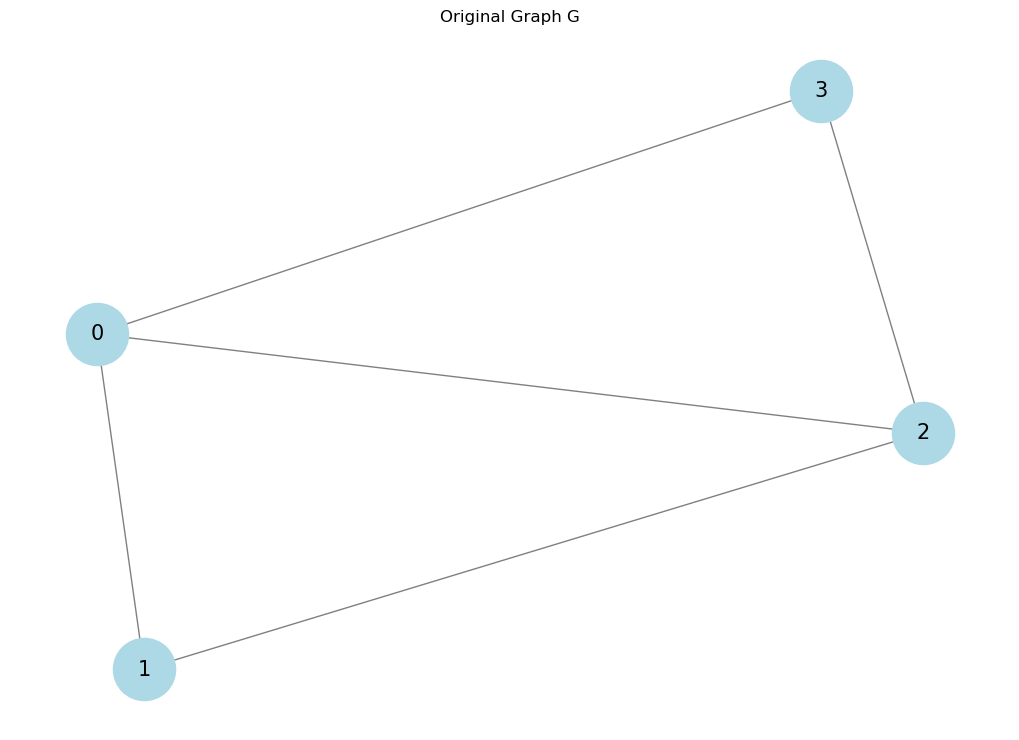

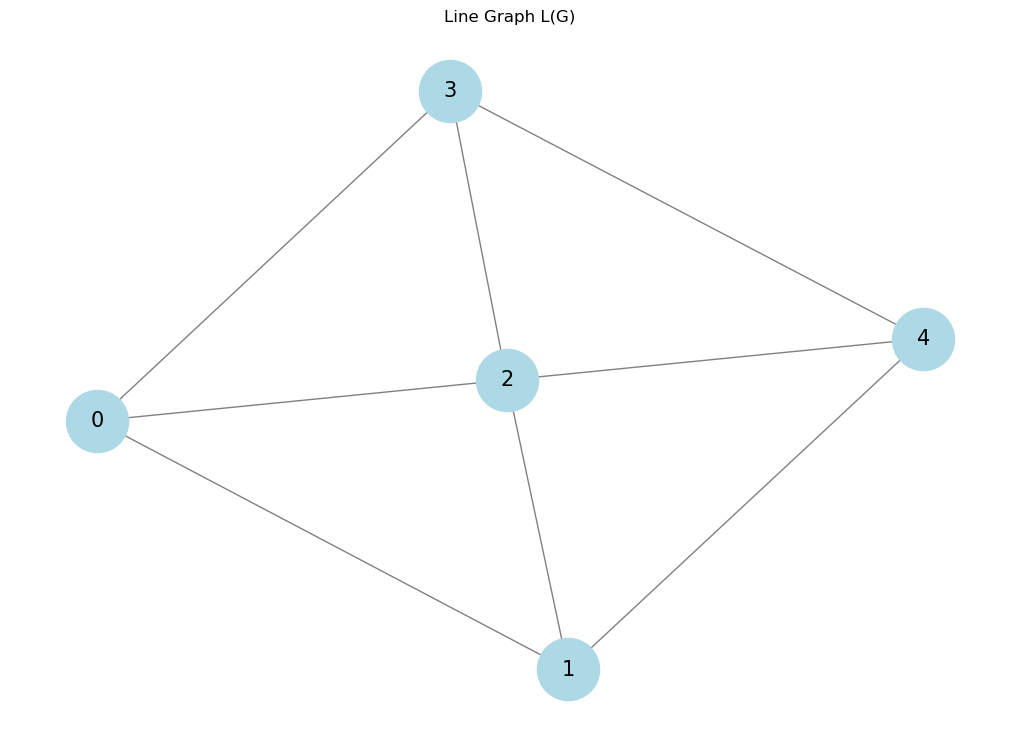

[0.6 0.6 0.6 0.6 0.6]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

def create_line_graph(G):
    """
    Creates the line graph of a given graph G.
    
    Parameters:
    G (networkx.Graph): The input graph.
    
    Returns:
    networkx.Graph: The line graph of G.
    """
    # Initialize the line graph
    L = nx.Graph()
    
    # Create a mapping from edges to nodes in the line graph
    edge_to_node = {edge: idx for idx, edge in enumerate(G.edges())}
    
    # Add nodes to the line graph
    for edge in G.edges():
        L.add_node(edge_to_node[edge])
    
    # Add edges to the line graph
    for edge1 in G.edges():
        for edge2 in G.edges():
            if edge1 != edge2 and len(set(edge1) & set(edge2)) > 0:
                L.add_edge(edge_to_node[edge1], edge_to_node[edge2])
    
    return L

def plot_graph(G, title):
    """
    Plots the given graph G.
    
    Parameters:
    G (networkx.Graph): The input graph.
    title (str): The title for the plot.
    """
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=15)
    plt.title(title)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create a sample graph G
    G = nx.Graph()
    G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)])
    
    # Create the line graph of G
    L = create_line_graph(G)
    
    # Plot the original graph and its line graph
    plot_graph(G, "Original Graph G")
    plot_graph(L, "Line Graph L(G)")
eta(G)
eta(L)
    
    





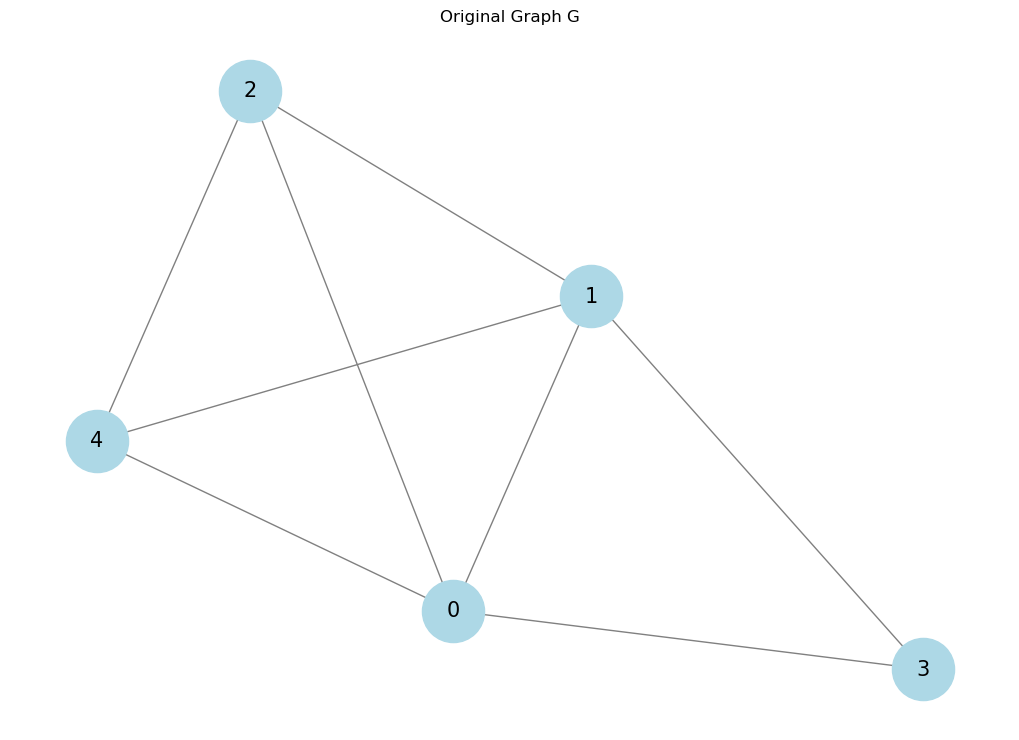

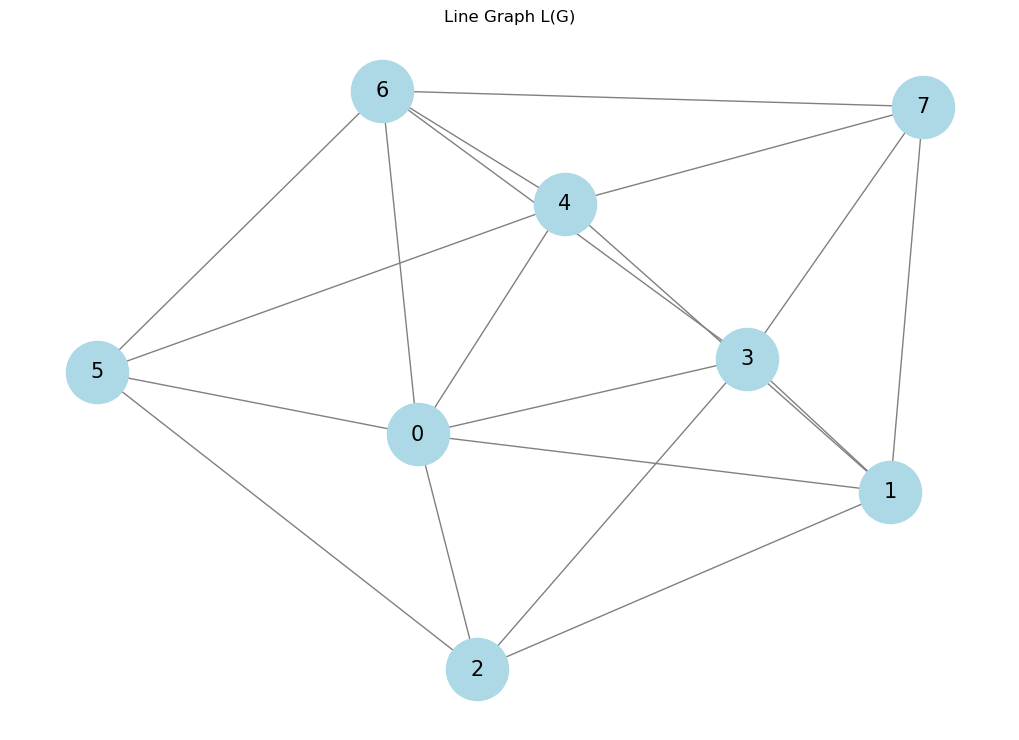

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
[0.36855507 0.36852746 0.36827169 0.36854596 0.36834322 0.36822913
 0.3683566  0.36835444 0.36836642 0.36847514 0.36821428 0.36864812
 0.36826495 0.36840208 0.36850129 0.36830894 0.36849314 0.3685475
 0.36859456]


In [21]:
# NEW Example usage
if __name__ == "__main__":
    # Create a sample graph G
    G = nx.random_geometric_graph(5, 0.8, seed=3810312)
    
    # Create the line graph of G
    L = create_line_graph(G)
    
    # Plot the original graph and its line graph
    plot_graph(G, "Original Graph G")
    plot_graph(L, "Line Graph L(G)")
print(eta(G))
print(eta(L))

[0.385 0.385 0.385 0.385 0.385 0.385 0.385 0.385 0.385 0.385 0.385 0.385
 0.385]


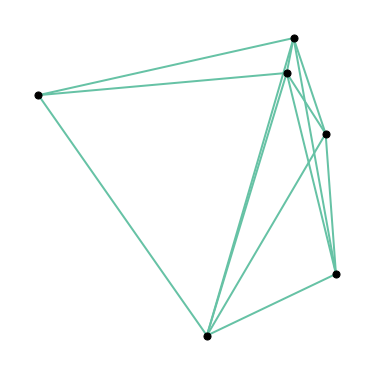

In [12]:
G = nx.random_geometric_graph(6, 0.8, seed=3810312)
pos = {v:d['pos'] for v,d in G.nodes(data=True)}
m = len(G.edges())
matrix(G)
mod,rho= modul(matrix(G),2,np.ones(m))
eta = np.round(rho/mod,3)
print(eta)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=50, node_color='black', width=2, edge_color=eta, edge_cmap=plt.cm.Set2)
plt.savefig("Graph.PDF", format="PDF")



In [ ]:
G = nx.Graph()
nx.add_path(G,['a0','a1','a2','a3','a4','a5','a0'])

nx.add_path(G,['b0','b1','b2','b3','b4','b5','b0'])

nx.add_path(G,['c0','c1','c2','c3','c4','c5','c0'])

nx.add_path(G,['d0','d1','d2','d3','d4','d5','d0'])

nx.add_path(G,['e0','e1','e2','e3','e4','e5','e0'])

nx.add_path(G,['f0','f1','f2','f3','f4','f5','f0'])

nx.add_path(G,['d0','d2','d4','d0','d3','d5','d1','d3'])
nx.add_path(G,['d1','d4'])
nx.add_path(G,['d2','d5'])

nx.add_path(G,['e0','e2','e4','e0','e3','e5','e1','e3'])
nx.add_path(G,['e1','e4'])
nx.add_path(G,['e2','e5'])

nx.add_path(G,['f0','f2','f4','f0','f3','f5','f1','f3'])
nx.add_path(G,['f1','f4'])
nx.add_path(G,['f2','f5'])

G.add_edge('a0', 'd0')
G.add_edge('a1', 'd1')
G.add_edge('a2', 'd2')
G.add_edge('a3', 'd3')
G.add_edge('a4', 'd4')
G.add_edge('a5', 'd5')

G.add_edge('b0', 'e0')
G.add_edge('b1', 'e1')
G.add_edge('b2', 'e2')
G.add_edge('b3', 'e3')
G.add_edge('b4', 'e4')
G.add_edge('b5', 'e5')

G.add_edge('c0', 'f0')
G.add_edge('c1', 'f1')
G.add_edge('c2', 'f2')
G.add_edge('c3', 'f3')
G.add_edge('c4', 'f4')
G.add_edge('c5', 'f5')

G.add_edge('a1', 'c4')
G.add_edge('c3', 'b0')
G.add_edge('b5', 'a2')

pos = nx.spring_layout(G)
m = len(G.edges())
matrix(G)
mod,rho= modul(matrix(G),2,np.ones(m))
eta = np.round(rho/mod,3)
print(eta)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=50, node_color='black', width=2, edge_color=eta, edge_cmap=plt.cm.Set2)

In [ ]:

H= nx.random_geometric_graph(6, 0.8, seed=3810312)
ng = len(H.nodes())

G0 = nx.random_geometric_graph(7, 0.8, seed=3810312)
ng0= len(G0.nodes())
mapping = dict(zip(G0, range(0,ng0 )))
G0 = nx.relabel_nodes(G0, mapping)


G1 = nx.random_geometric_graph(8, 0.8, seed=3810312)
ng1= len(G1.nodes())
mapping = dict(zip(G1, range(ng0,ng0+ng1 )))
G1 = nx.relabel_nodes(G1, mapping)



G2 = nx.random_geometric_graph(9, 0.8, seed=3810312)
ng2= len(G2.nodes())
mapping = dict(zip(G2, range(ng0+ng1,ng0+ng1+ng2 )))
G2 = nx.relabel_nodes(G2, mapping)



G3 = nx.random_geometric_graph(10, 0.8, seed=3810312)
ng3= len(G3.nodes())
mapping = dict(zip(G3, range(ng0+ng1+ng2,ng0+ng1+ng2+ng3 )))
G3 = nx.relabel_nodes(G3, mapping)


G4 = nx.random_geometric_graph(11, 0.8, seed=3810312)
ng4= len(G4.nodes())
mapping = dict(zip(G4, range(ng0+ng1+ng2+ng3,ng0+ng1+ng2+ng3+ng4 )))
G4 = nx.relabel_nodes(G4, mapping)


G5 = nx.random_geometric_graph(12, 0.8, seed=3810312)
ng5= len(G5.nodes())
mapping = dict(zip(G5, range(ng0+ng1+ng2+ng3+ng4,ng0+ng1+ng2+ng3+ng4+ng5 )))
G5 = nx.relabel_nodes(G5, mapping)

L = [G0,G1,G2,G3,G4,G5]
G= nx.Graph()
for u in range(ng):
    for (x,y) in L[u].edges():
            G.add_edge(x, y)            
for (u,v) in H.edges():
    m=random.choice(list(L[u].nodes()))
    n=random.choice(list(L[v].nodes()))
    G.add_edge(m, n)
    


In [ ]:
pos = nx.spring_layout(G,seed = 123)
m = len(G.edges())
mst = MinimumSpanningTree(G)
mod, cons, rho, lam = modulus(m, matrix_modulus, mst, max_iter=400)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=50, node_color='black', width=2, edge_color=rho, edge_cmap=plt.cm.Set2)
plt.savefig("Graph.PDF", format="PDF")
print(len(G.nodes))
print(len(G.edges))

In [ ]:
def deflation(H,L):
    ng = len(H.nodes())
    ne = []
    nr = [0]
    for u in range(ng):
        ne.append(len(L[u].nodes()))
    for u in range(ng): 
        nr.append( sum(ne[:(u+1)]))
    for u in range(ng): 
        mapping = dict(zip(L[u], range(nr[u],nr[u+1])))
        L[u] = nx.relabel_nodes(L[u], mapping)  
    G= nx.Graph()
    for u in range(ng):
        for (x,y) in L[u].edges():
            G.add_edge(x, y)            
    for (u,v) in H.edges():
        m=random.choice(list(L[u].nodes()))
        s=random.choice(list(L[v].nodes()))
        G.add_edge(m, s)

    return G

def MODD(G):
    pos = nx.spring_layout(G,seed = 123)
    m = len(G.edges())
    mst = MinimumSpanningTree(G)
    mod, cons, rho, lam = modulus(m, matrix_modulus, mst, max_iter=400)
    plt.figure(figsize=(5,5))
    nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color=rho, edge_cmap=plt.cm.Set2)
    return rho,mod

In [ ]:
n=6
H= nx.random_geometric_graph(n, 0.85, seed=3810312)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u+1, 0.9, seed=3810312)
    L.append(M)
G1 = deflation(H,L)
rho,mod=MODD(G1)

n=5
H= nx.random_geometric_graph(n, 0.9, seed=3810312 )
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+2, 0.9, seed=3810312)
    L.append(M)
G2 = deflation(H,L)
rho,mod=MODD(G2)

n=5
H= nx.random_geometric_graph(n,0.9, seed=381)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u+1, 0.9, seed=3810312)
    L.append(M)
G3 = deflation(H,L)
rho,mod=MODD(G3)

n=5
H= nx.random_geometric_graph(n,0.8, seed=3810312)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u+1, 0.9, seed=3810312)
    L.append(M)
G4 = deflation(H,L)
rho,mod=MODD(G4)

n=4
H= nx.random_geometric_graph(n, 0.9, seed=3810312)
print(len(H.edges()))
L=[G1,G2,G3,G4]
G = deflation(H,L)
rho,mod=MODD(G)

In [ ]:
n=4
H= nx.random_geometric_graph(n,0.9, seed=3810312)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+3, 0.9)
    L.append(M)  
ng = len(H.nodes())
ne = []
nr = [0]
for u in range(ng):
    ne.append(len(L[u].nodes()))
for u in range(ng): 
    nr.append( sum(ne[:(u+1)]))
for u in range(ng): 
    mapping = dict(zip(L[u], range(nr[u],nr[u+1])))
    L[u] = nx.relabel_nodes(L[u], mapping)  
G= nx.Graph()
for u in range(ng):
    for (x,y) in L[u].edges():
        G.add_edge(x, y) 
for i in range(3):
    for (u,v) in H.edges():
        k=random.choice(list(L[u].nodes()))
        l=random.choice(list(L[v].nodes()))
        G.add_edge(k, l)       
pos = nx.spring_layout(G,seed = 123)
ed = []
edge = []
for (u,v) in G.edges():
    for x in range(n):
        if (u,v) in L[x].edges():
            ed.append((u,v))
for e in G.edges():
    if e not in ed:
        edge.append(e)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color='tab:orange')
nx.draw_networkx_edges(G, pos, edgelist=edge, width=2, edge_color='tab:blue')
plt.savefig("partiiton.PDF", format="PDF")

In [ ]:
G= nx.random_geometric_graph(20,0.5, seed=3810312)
ed =[]
edge = []
for (u,v) in G.edges():
    for i in range(2):
        if u in range(i*10,i*10+10) and v in range(i*10,i*10+10):
             ed.append((u,v))
for e in G.edges():
    if e not in ed:
        edge.append(e)

pos = nx.spring_layout(G,seed = 123)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=edge, width=2, edge_color='yellow')
nx.draw_networkx_nodes(G, pos,node_size=10, nodelist=range(10), node_color='red')
nx.draw_networkx_nodes(G, pos,node_size=10, nodelist=range(10,20), node_color='blue')
plt.savefig("partiiton.PDF", format="PDF")

In [ ]:
n=2
H= nx.random_geometric_graph(n,0.9, seed=3810312)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+3, 0.9)
    L.append(M)  
ng = len(H.nodes())
ne = []
nr = [0]
for u in range(ng):
    ne.append(len(L[u].nodes()))
for u in range(ng): 
    nr.append( sum(ne[:(u+1)]))
for u in range(ng): 
    mapping = dict(zip(L[u], range(nr[u],nr[u+1])))
    L[u] = nx.relabel_nodes(L[u], mapping)  
G= nx.Graph()
for u in range(ng):
    for (x,y) in L[u].edges():
        G.add_edge(x, y) 
for i in range(5):
    for (u,v) in H.edges():
        k=random.choice(list(L[u].nodes()))
        l=random.choice(list(L[v].nodes()))
        G.add_edge(k, l)       
pos = nx.spring_layout(G,seed = 123)
ed = []
edge = []
for (u,v) in G.edges():
    for x in range(n):
        if (u,v) in L[x].edges():
            ed.append((u,v))
for e in G.edges():
    if e not in ed:
        edge.append(e)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color='tab:orange')
nx.draw_networkx_edges(G, pos, edgelist=edge, width=2, edge_color='tab:blue')
plt.savefig("partiiton.PDF", format="PDF")

In [ ]:

n=4
H= nx.complete_graph(n)
L=[]
for u in range(n):
    M = nx.complete_graph(n)
    L.append(M)  
ng = len(H.nodes())
ne = []
nr = [0]
for u in range(ng):
    ne.append(len(L[u].nodes()))
for u in range(ng): 
    nr.append( sum(ne[:(u+1)]))
for u in range(ng): 
    mapping = dict(zip(L[u], range(nr[u],nr[u+1])))
    L[u] = nx.relabel_nodes(L[u], mapping)  
G= nx.Graph()
for u in range(ng):
    for (x,y) in L[u].edges():
        G.add_edge(x, y) 
for i in range(1):
    for (u,v) in H.edges():
        k=random.choice(list(L[u].nodes()))
        l=random.choice(list(L[v].nodes()))
        G.add_edge(k, l)       
pos = nx.spring_layout(G)
ed = []
edge = []
for (u,v) in G.edges():
    for x in range(n):
        if (u,v) in L[x].edges():
            ed.append((u,v))
for e in G.edges():
    if e not in ed:
        edge.append(e)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color='tab:orange')
nx.draw_networkx_edges(G, pos, edgelist=edge, width=2, edge_color='tab:blue')
plt.savefig("partition2.PDF", format="PDF")

In [ ]:
n=2
L=[]
for u in range(n):
    M = nx.complete_graph(6)
    L.append(M)
ng = n
ne = []
nr = [0]
for u in range(ng):
    ne.append(len(L[u].nodes()))
for u in range(ng): 
    nr.append( sum(ne[:(u+1)]))
for u in range(ng): 
    mapping = dict(zip(L[u], range(nr[u],nr[u+1])))
    L[u] = nx.relabel_nodes(L[u], mapping)  
G= nx.Graph()
for u in range(ng):
    for (x,y) in L[u].edges():
        G.add_edge(x, y) 
        
for u in range(3):
        k=random.choice(list(L[0].nodes()))
        G.add_edge(k, 100) 
for u in range(4):
        k=random.choice(list(L[1].nodes()))
        G.add_edge(k, 100) 
pos = nx.spring_layout(G)
ed = []
edge = []
for (u,v) in G.edges():
    for x in range(n):
        if (u,v) in L[x].edges():
            ed.append((u,v))
for e in G.edges():
    if e not in ed:
        edge.append(e)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color='tab:orange')
nx.draw_networkx_edges(G, pos, edgelist=edge, width=2, edge_color='tab:blue')
plt.savefig("partiiton.PDF", format="PDF")

In [ ]:
n=5
H= nx.random_geometric_graph(n,  0.7, seed=381)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u+1, 0.9, seed=3810312)
    L.append(M)
G7 = deflation(H,L)
rho,mod=MODD(G7)

In [ ]:
n=4
H= nx.random_geometric_graph(n,0.9, seed=3810312)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u+1, 0.9,seed= u)
    L.append(M)
G4 = deflation(H,L)
rho,mod=MODD(G4)
plt.savefig("par1.PDF", format="PDF")

In [ ]:

n=4
H= nx.random_geometric_graph(n, 0.9, seed=3810312)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(5+u, 0.9, seed=3810312)
    L.append(M)
G1 = deflation(H,L)

n=5
H= nx.random_geometric_graph(n, 0.9, seed=3810312 )
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u, 0.9, seed=3810312)
    L.append(M)
G2 = deflation(H,L)

n=4
H= nx.random_geometric_graph(n,0.9, seed=3)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u+1, 0.9, seed=3810312)
    L.append(M)
G3 = deflation(H,L)

n=5
H= nx.random_geometric_graph(n,0.8, seed=3810312)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u+1, 0.9, seed=3810312)
    L.append(M)
G4 = deflation(H,L)

n=4

H= nx.Graph()
H.add_edges_from([(0,1),(1,2),(2,3),(3,0)])
L=[G1,G2,G3,G4]
G = deflation(H,L)
rho,mod=MODD(G)
plt.figure(figsize=(5,5))

eta = rho/mod
maxi = max(eta)
print(maxi)
edge= []

for (u,v) in G.edges():
    l = G[u][v]['enum']
    if abs(maxi - eta[l]) < 1e-2:
        edge.append((u,v))

pos = nx.spring_layout(G,seed = 123)
nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color=rho, edge_cmap=plt.cm.Set2)        
nx.draw_networkx_edges(G, pos, edgelist=edge, width=2, edge_color='red')
plt.savefig("par2.PDF", format="PDF")


In [ ]:
pos = nx.spring_layout(G,seed = 123)
nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color=rho, edge_cmap=plt.cm.Set2)        
nx.draw_networkx_edges(G, pos, edgelist=edge, width=2, edge_color='white',style='dashed')
plt.savefig("par3.PDF", format="PDF")

In [ ]:
P = nx.complete_graph(6)
for u in range(6):
    P.add_edge(u,u+6)
nx.add_path(P,[6,7,8,9,10,11,6])
rho,mod=MODD(P)
plt.savefig("densest.PDF", format="PDF")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from modulus_tools import demo_graphs
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cdd
from modulus_tools import demo_graphs
from modulus_tools import algorithms as alg
from itertools import product
import random




In [ ]:
G = nx.complete_graph(6)

In [ ]:
trees = list(alg.spanning_trees(G))
edd = []
dt = []
for tree in trees:
    disjoint = True
    for u in tree:
        if u in edd:
            disjoint = False
    if disjoint is True:
        dt.append(tree)
        for u in tree:
            edd.append(u)
print(dt)
pos = nx.circular_layout(G)
nx.draw(G, pos, node_size=100, node_color='black', width=3,edge_color='gray')
for u in range(len(dt)):
    edges = dt[u]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=3, edge_color= 'blue')


[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


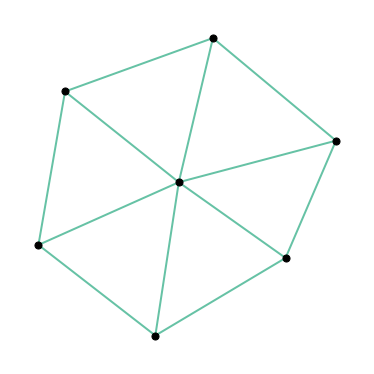

In [15]:
G = nx.Graph()
nx.add_path(G,['a0','a1','a2','a3','a4','a5','a0'])

G.add_edge('a0','u')
G.add_edge('a1','u')
G.add_edge('a2','u')
G.add_edge('a3','u')
G.add_edge('a4','u')
G.add_edge('a5','u')

pos = nx.spring_layout(G)
m = len(G.edges())
matrix(G)
mod,rho= modul(matrix(G),2,np.ones(m))
eta = np.round(rho/mod,3)
print(eta)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=50, node_color='black', width=2, edge_color=eta, edge_cmap=plt.cm.Set2)